In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np


In [2]:
#import datasets and add attack column with attack name
dfnormal=pd.read_csv("Data_of_Attack_Back_Normal.csv")
dfnormal["attack"] = "normal"

df=pd.read_csv("Data_of_Attack_Back.csv")
df["attack"] = "back"

dfbof=pd.read_csv("Data_of_Attack_Back_BufferOverflow.csv")
dfbof["attack"] = "buffer_over_flow"

dfgp=pd.read_csv("Data_of_Attack_Back_GuessPassword.csv")
dfgp["attack"] = "guess_password"

dfneptune=pd.read_csv("Data_of_Attack_Back_Neptune.csv")
dfneptune["attack"] = "neptune"

dfnmap=pd.read_csv("Data_of_Attack_Back_NMap.csv")
dfnmap["attack"] = "nmap"

dfportsweep=pd.read_csv("Data_of_Attack_Back_PortSweep.csv")
dfportsweep["attack"] = "port_sweep"

dfrootkit=pd.read_csv("Data_of_Attack_Back_RootKit.csv")
dfrootkit["attack"] = "root_kit"

dfsatan=pd.read_csv("Data_of_Attack_Back_Satan.csv")
dfsatan["attack"] = "satan"

dfsmurf = pd.read_csv("Data_of_Attack_Back_Smurf.csv")
dfsmurf["attack"] = "smurf"

In [3]:
#append all the datasets
finaldf = pd.concat([dfnormal,df,dfbof,dfgp,dfneptune,dfnmap,dfportsweep,dfrootkit,dfsatan,dfsmurf])

In [4]:
#import ftp write datset adn set columns names as it doesnt have header
dfftpw=pd.read_csv("Data_of_Attack_Back_FTPWrite.csv",header=None,names=finaldf.columns)
dfftpw["attack"] = "ftpwrite"

In [5]:
dfftpw.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0026,0,0.07,0,0.00116,0.00451,0,0,0.0,0.2,...,0.001,0.10,0.0,0.10,0.000,0,0,0,0,ftpwrite
1,0.0134,0,0.34,0,0.00100,0.39445,0,0,0.2,0.0,...,0.001,0.05,0.1,0.05,0.000,0,0,0,0,ftpwrite
2,0.0000,0,0.14,0,0.00613,0.00000,0,0,0.0,0.0,...,0.084,0.10,0.0,0.10,0.002,0,0,0,0,ftpwrite


In [6]:
finaldf = pd.concat([finaldf,dfftpw])

In [7]:
#create a binary column for attack or normal
finaldf["attack12"] = np.where(finaldf.attack=="normal",0,1)

In [8]:
finaldf.columns=finaldf.columns.str.strip()

In [9]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817551 entries, 0 to 7
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817551 non-null  float64
 1   protocol_type                817551 non-null  float64
 2   service                      817551 non-null  float64
 3   flag                         817551 non-null  float64
 4   src_bytes                    817551 non-null  float64
 5   dst_bytes                    817551 non-null  float64
 6   land                         817551 non-null  int64  
 7   wrong_fragment               817551 non-null  float64
 8   urgent                       817551 non-null  float64
 9   hot                          817551 non-null  float64
 10  num_failed_logins            817551 non-null  float64
 11  logged_in                    817551 non-null  float64
 12  num_compromised              817551 non-null  float64
 13  root

In [10]:
# get number of unique values for each feature
finaldf.nunique().sort_values()

num_outbound_cmds                  1
land                               1
is_guest_login                     2
is_host_login                      2
root_shell                         2
logged_in                          2
wrong_fragment                     2
attack12                           2
su_attempted                       3
num_shells                         3
protocol_type                      3
urgent                             5
num_failed_logins                  6
num_access_files                   9
hot                               11
num_compromised                   11
flag                              11
num_root                          11
num_file_creations                11
attack                            11
srv_rerror_rate                   60
service                           67
dst_host_srv_diff_host_rate       68
srv_diff_host_rate                72
srv_error_rate                    75
rerror_rate                       85
diff_srv_rate                     90
s

In [11]:
#dropping features with one unique value as it doesnt haev any variance
finaldf.drop(columns=['land','num_outbound_cmds'],inplace=True)

In [12]:
x=finaldf.nunique().sort_values()
x[x<60]

attack12               2
is_guest_login         2
is_host_login          2
wrong_fragment         2
root_shell             2
logged_in              2
protocol_type          3
num_shells             3
su_attempted           3
urgent                 5
num_failed_logins      6
num_access_files       9
hot                   11
num_root              11
num_file_creations    11
flag                  11
attack                11
num_compromised       11
dtype: int64

In [13]:
cat_cols=['protocol_type','logged_in','root_shell',
          'su_attempted','is_host_login','is_guest_login']

In [14]:
finaldf.protocol_type.unique()

array([0.  , 0.01, 0.02])

In [15]:
finaldf.service.unique()

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.13, 0.14, 0.17, 0.32, 0.22, 0.12, 0.33, 0.39, 0.19, 0.62,
       0.35, 0.53, 0.48, 0.45, 0.34, 0.5 , 0.54, 0.44, 0.37, 0.61, 0.49,
       0.2 , 0.21, 0.18, 0.31, 0.3 , 0.16, 0.15, 0.23, 0.25, 0.24, 0.26,
       0.27, 0.29, 0.28, 0.55, 0.59, 0.47, 0.52, 0.43, 0.56, 0.36, 0.6 ,
       0.51, 0.41, 0.57, 0.58, 0.46, 0.4 , 0.42, 0.38, 0.63, 0.64, 0.65,
       0.67])

In [16]:
finaldf.flag.unique()

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1 , 0.09])

In [17]:
finaldf[cat_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
protocol_type,817551.0,5.696036e-04,0.002596,0.0,0.0,0.0,0.0,0.02
logged_in,817551.0,6.381192e-02,0.048054,0.0,0.0,0.1,0.1,0.10
root_shell,817551.0,3.070145e-05,0.001752,0.0,0.0,0.0,0.0,0.10
su_attempted,817551.0,1.113080e-05,0.001412,0.0,0.0,0.0,0.0,0.20
is_host_login,817551.0,1.223165e-07,0.000111,0.0,0.0,0.0,0.0,0.10
is_guest_login,817551.0,2.770469e-04,0.005256,0.0,0.0,0.0,0.0,0.10


In [18]:
finaldf["wrong_fragment"].value_counts()

0.0    817550
0.3         1
Name: wrong_fragment, dtype: int64

In [19]:
finaldf.drop(columns = ["service","flag","wrong_fragment"],inplace=True)

In [20]:
con_cols=finaldf.columns.difference(cat_cols+["attack"])

In [21]:
dum = pd.get_dummies( finaldf.loc[:, "protocol_type"], drop_first = True )

In [22]:
finaldf = pd.concat([finaldf,dum],axis=1)

In [23]:
finaldf.drop(columns = ["protocol_type"],inplace=True)

In [24]:
finaldf.su_attempted.unique()

array([0. , 0.2, 0.1])

In [25]:
finaldf.su_attempted = np.where(~(finaldf.su_attempted == 0.0),1,0)

In [26]:
finaldf.su_attempted.unique()

array([0, 1])

In [27]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 

In [28]:
finaldf.isnull().sum()

duration                       0
src_bytes                      0
dst_bytes                      0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_s

In [29]:
finaldf.loc[:,['attack','attack12']]

,attack,attack12
0,normal,0
1,normal,0
2,normal,0
3,normal,0
4,normal,0
...,...,...
3,ftpwrite,1
4,ftpwrite,1
5,ftpwrite,1
6,ftpwrite,1


In [30]:
attck = finaldf.loc[:,"attack"]

In [31]:
attck.value_counts()

normal              576710
neptune             227228
satan                 5019
smurf                 3007
port_sweep            2964
nmap                  1554
back                   968
guess_password          53
buffer_over_flow        30
root_kit                10
ftpwrite                 8
Name: attack, dtype: int64

In [32]:
finaldf["attack12"].value_counts()

0    576710
1    240841
Name: attack12, dtype: int64

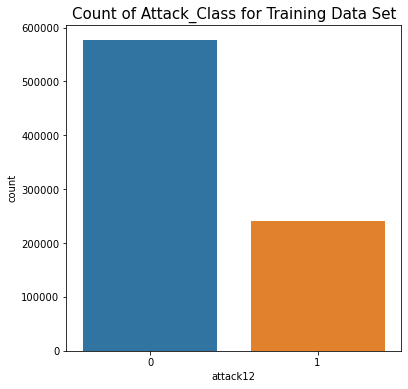

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.title('Count of Attack_Class for Training Data Set',fontsize=15)
sns.countplot("attack12", data=finaldf)
plt.show()

In [34]:
finaldf.drop(columns='attack',inplace=True)

In [35]:
finaldf[con_cols].apply(continuous_var_summary)

,attack12,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,...,num_shells,rerror_rate,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_error_rate,srv_rerror_rate,urgent
dtype,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,2,512,90,18399,256,101,101,101,101,101,...,3,85,101,96,5908,512,72,75,60,5
n_tot,817551,817551,817551,817551,817551,817551,817551,817551,817551,817551,...,817551,817551,817551,817551,817551,817551,817551,817551,817551,817551
n,817551,817551,817551,817551,817551,817551,817551,817551,817551,817551,...,817551,817551,817551,817551,817551,817551,817551,817551,817551,817551
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,240841,48936.186,2402.468,20326.03324,136423.302,2763.32,4392.049,5026.182,54608.021,20328.601,...,16.1,4378.22,60065.972,20302.607,4056.18442,11509.508,8228.031,20380.639,4344.039,2.1
mean,0.294588,0.059857,0.002939,0.024862,0.166868,0.00338,0.005372,0.006148,0.066795,0.024865,...,0.00002,0.005355,0.073471,0.024833,0.004961,0.014078,0.010064,0.024929,0.005313,0.000003
std,0.455858,0.091984,0.010127,0.066635,0.102058,0.008557,0.02192,0.01746,0.043421,0.043062,...,0.001412,0.02233,0.041806,0.043074,0.033235,0.031403,0.023558,0.043153,0.022215,0.000805
var,0.207806,0.008461,0.000103,0.00444,0.010416,0.000073,0.00048,0.000305,0.001885,0.001854,...,0.000002,0.000499,0.001748,0.001855,0.001105,0.000986,0.000555,0.001862,0.000494,0.000001


In [36]:
#deal with outliners
#finaldf[con_cols] = finaldf[con_cols].apply( lambda x: x.clip( lower = x.quantile(0.01), upper = x.quantile(0.99) ) )

In [37]:
col = finaldf[con_cols].std()
col=col[(col<0.05)].index

In [38]:
col1 = con_cols.difference(col)

In [39]:
import statsmodels.formula.api as smf

In [40]:
finaldf.head(3)

,duration,src_bytes,dst_bytes,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack12,0.01,0.02
0,0.0,0.00215,0.45076,0.0,0.0,0.0,0.1,0.0,0.0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0
1,0.0,0.00162,0.04528,0.0,0.0,0.0,0.1,0.0,0.0,0,...,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0,0,0
2,0.0,0.00236,0.01228,0.0,0.0,0.0,0.1,0.0,0.0,0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0,0,0


In [41]:
con_cols.difference(["attack12"])

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate',
       'dst_host_srv_serror_rate', 'duration', 'hot', 'num_access_files',
       'num_compromised', 'num_failed_logins', 'num_file_creations',
       'num_root', 'num_shells', 'rerror_rate', 'same_srv_rate', 'serror_rate',
       'src_bytes', 'srv_count', 'srv_diff_host_rate', 'srv_error_rate',
       'srv_rerror_rate', 'urgent'],
      dtype='object')

In [42]:
import statsmodels.formula.api as smf
from sklearn import metrics
roc_auc = []
for var in con_cols.difference(["attack12"]):
    print(var)
    m1 = smf.logit('attack12~'+var, data=finaldf).fit()
    score = metrics.roc_auc_score(finaldf["attack12"],m1.predict())
    roc_auc.append(score)
    

count
Optimization terminated successfully.
         Current function value: 0.144593
         Iterations 9
diff_srv_rate
Optimization terminated successfully.
         Current function value: 0.413927
         Iterations 8
dst_bytes
Optimization terminated successfully.
         Current function value: inf
         Iterations 13
dst_host_count
Optimization terminated successfully.
         Current function value: 0.402241
         Iterations 9
dst_host_diff_srv_rate
Optimization terminated successfully.
         Current function value: 0.387226
         Iterations 8
dst_host_rerror_rate
Optimization terminated successfully.
         Current function value: 0.584938
         Iterations 5
dst_host_same_src_port_rate
Optimization terminated successfully.
         Current function value: 0.596197
         Iterations 7
dst_host_same_srv_rate
Optimization terminated successfully.
         Current function value: 0.118491
         Iterations 10
dst_host_serror_rate
Optimization terminated su

C:\Users\Anant\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


rerror_rate
Optimization terminated successfully.
         Current function value: 0.584108
         Iterations 5
same_srv_rate
Optimization terminated successfully.
         Current function value: 0.065425
         Iterations 9
serror_rate
Optimization terminated successfully.
         Current function value: 0.177421
         Iterations 11
src_bytes
Optimization terminated successfully.
         Current function value: 0.601620
         Iterations 9
srv_count
Optimization terminated successfully.
         Current function value: 0.606012
         Iterations 5
srv_diff_host_rate
Optimization terminated successfully.
         Current function value: 0.525098
         Iterations 10
srv_error_rate
Optimization terminated successfully.
         Current function value: 0.177856
         Iterations 10
srv_rerror_rate
Optimization terminated successfully.
         Current function value: 0.584722
         Iterations 5
urgent
Optimization terminated successfully.
         Current function va

In [43]:
roc_auc_score = pd.concat([pd.Series(con_cols.difference(["attack12"])),pd.Series(roc_auc)],axis=1)
roc_auc_score.columns = ['feature', 'auc_score']

In [44]:
roc_auc_score

,feature,auc_score
0,count,0.972571
1,diff_srv_rate,0.975207
2,dst_bytes,0.961945
3,dst_host_count,0.831527
4,dst_host_diff_srv_rate,0.951983
5,dst_host_rerror_rate,0.546548
6,dst_host_same_src_port_rate,0.795734
7,dst_host_same_srv_rate,0.984542
8,dst_host_serror_rate,0.925278
9,dst_host_srv_count,0.980322


In [45]:
 col2=roc_auc_score.sort_values(by='auc_score', ascending=False).head(20).feature.values

In [46]:
from sklearn.model_selection import train_test_split


train_b_X, test_b_X, train_b_y, test_b_y = train_test_split(finaldf[con_cols.difference(["attack12"])], 
                                                            finaldf["attack12"],
                                                            test_size = 0.2,
                                                            random_state = 123 )

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 )
radm_clf.fit( train_b_X, train_b_y )

RandomForestClassifier(oob_score=True)

In [49]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_b_X.shape[1]):
    feature_rank.loc[f] = [f+1,
                         train_b_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

In [50]:
print(feature_rank.iloc[0:40])

    rank                      feature    importance
0      1                diff_srv_rate  1.855440e-01
1      2                same_srv_rate  1.631879e-01
2      3       dst_host_same_srv_rate  1.473147e-01
3      4                    src_bytes  1.259501e-01
4      5     dst_host_srv_serror_rate  6.540678e-02
5      6                        count  5.962110e-02
6      7                    dst_bytes  4.332442e-02
7      8                  serror_rate  4.066932e-02
8      9           dst_host_srv_count  4.038781e-02
9     10               srv_error_rate  3.293622e-02
10    11       dst_host_diff_srv_rate  2.364774e-02
11    12         dst_host_serror_rate  2.006562e-02
12    13  dst_host_srv_diff_host_rate  1.389743e-02
13    14               dst_host_count  1.147412e-02
14    15  dst_host_same_src_port_rate  9.646406e-03
15    16                    srv_count  6.890792e-03
16    17     dst_host_srv_rerror_rate  3.004369e-03
17    18              num_compromised  2.152083e-03
18    19    

In [51]:
# Retaining 25 columns according to the importance
rf = list(feature_rank.iloc[0:20]['feature'].values)
print(rf)
print('\nNo. of features:',len(rf))

['diff_srv_rate', 'same_srv_rate', 'dst_host_same_srv_rate', 'src_bytes', 'dst_host_srv_serror_rate', 'count', 'dst_bytes', 'serror_rate', 'dst_host_srv_count', 'srv_error_rate', 'dst_host_diff_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_diff_host_rate', 'dst_host_count', 'dst_host_same_src_port_rate', 'srv_count', 'dst_host_srv_rerror_rate', 'num_compromised', 'dst_host_rerror_rate', 'srv_diff_host_rate']

No. of features: 20


In [52]:
# Select K Best
from sklearn.feature_selection import SelectKBest, f_classif
cl = con_cols.difference(["attack12"])
SKB = SelectKBest(f_classif, k=19).fit(finaldf[con_cols.difference(["attack12"])], finaldf["attack12"])
imp_vars_SKB = list(cl[SKB.get_support()])

In [53]:
xc = finaldf.columns.difference(con_cols)
xc

Index([            0.01,             0.02, 'is_guest_login',  'is_host_login',
            'logged_in',     'root_shell',   'su_attempted'],
      dtype='object')

In [54]:
#Final List
fcol = list(set(list(col1)+list(col2)+ rf+imp_vars_SKB+list(xc)))  #union 
len(fcol)

30

In [55]:
from sklearn.model_selection import train_test_split
xvars = fcol
yvar = "attack12"

In [56]:
finaldf["attack12"].value_counts()

0    576710
1    240841
Name: attack12, dtype: int64

In [57]:
xtrain,xtest,ytrain,ytest = train_test_split(finaldf[xvars],finaldf[yvar],test_size = 0.3, random_state = 1)

In [58]:
ytrain.value_counts()

0    403690
1    168595
Name: attack12, dtype: int64

# Binomial classification

In [59]:
 from xgboost import XGBClassifier

In [60]:
xgbest = XGBClassifier()

In [61]:
xgbest.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [62]:
ytrp = xgbest.predict(xtrain)

In [63]:
ytsp = xgbest.predict(xtest)

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain,ytrp)

array([[403690,      0],
       [     0, 168595]], dtype=int64)

In [65]:
confusion_matrix(ytest,ytsp)

array([[173020,      0],
       [     0,  72246]], dtype=int64)

In [66]:
metrics.roc_auc_score(ytrain,ytrp)

1.0

In [67]:
metrics.roc_auc_score(ytest,ytsp)

1.0

In [68]:
from sklearn.model_selection import cross_val_score
X = finaldf[xvars]
Y = finaldf[yvar]
p =cross_val_score(xgbest,X,Y,cv = 10) 

In [69]:
p.mean()

1.0

In [70]:
print(metrics.classification_report(ytrain, ytrp ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    403690
           1       1.00      1.00      1.00    168595

    accuracy                           1.00    572285
   macro avg       1.00      1.00      1.00    572285
weighted avg       1.00      1.00      1.00    572285



In [71]:
print(metrics.classification_report(ytest, ytsp ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    173020
           1       1.00      1.00      1.00     72246

    accuracy                           1.00    245266
   macro avg       1.00      1.00      1.00    245266
weighted avg       1.00      1.00      1.00    245266



# Multinomial classification

In [72]:
finaldf["attack"] = attck

In [73]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817551 entries, 0 to 7
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817551 non-null  float64
 1   src_bytes                    817551 non-null  float64
 2   dst_bytes                    817551 non-null  float64
 3   urgent                       817551 non-null  float64
 4   hot                          817551 non-null  float64
 5   num_failed_logins            817551 non-null  float64
 6   logged_in                    817551 non-null  float64
 7   num_compromised              817551 non-null  float64
 8   root_shell                   817551 non-null  float64
 9   su_attempted                 817551 non-null  int32  
 10  num_root                     817551 non-null  float64
 11  num_file_creations           817551 non-null  float64
 12  num_shells                   817551 non-null  float64
 13  num_

In [74]:
attck.value_counts()

normal              576710
neptune             227228
satan                 5019
smurf                 3007
port_sweep            2964
nmap                  1554
back                   968
guess_password          53
buffer_over_flow        30
root_kit                10
ftpwrite                 8
Name: attack, dtype: int64

In [75]:
attck.value_counts()/attck.value_counts().sum()

normal              0.705412
neptune             0.277937
satan               0.006139
smurf               0.003678
port_sweep          0.003625
nmap                0.001901
back                0.001184
guess_password      0.000065
buffer_over_flow    0.000037
root_kit            0.000012
ftpwrite            0.000010
Name: attack, dtype: float64

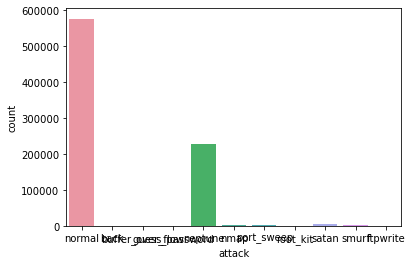

In [76]:
sns.countplot(x="attack",data=finaldf)

In [77]:
finaldf["attack"] = finaldf["attack"].replace({"normal":0,"neptune":1,"satan":2,"smurf":3,
                           "port_sweep":4,"nmap":5,"back":6,"guess_password":7
                           ,"buffer_over_flow":8,"root_kit":9,"ftpwrite":10})



In [78]:
finaldf.drop(columns="attack12",inplace=True)

In [79]:
con_cols = con_cols.difference(["attack12"])
con_cols

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate',
       'dst_host_srv_serror_rate', 'duration', 'hot', 'num_access_files',
       'num_compromised', 'num_failed_logins', 'num_file_creations',
       'num_root', 'num_shells', 'rerror_rate', 'same_srv_rate', 'serror_rate',
       'src_bytes', 'srv_count', 'srv_diff_host_rate', 'srv_error_rate',
       'srv_rerror_rate', 'urgent'],
      dtype='object')

In [80]:
finaldf.dtypes

duration                       float64
src_bytes                      float64
dst_bytes                      float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                      float64
num_compromised                float64
root_shell                     float64
su_attempted                     int32
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
is_host_login                  float64
is_guest_login                 float64
count                          float64
srv_count                      float64
serror_rate                    float64
srv_error_rate                 float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

In [81]:
col = finaldf[con_cols].std()
col=col[(col<0.05)].index

In [82]:
col1 = con_cols.difference(col)

In [83]:
from sklearn.model_selection import train_test_split


train_b_X, test_b_X, train_b_y, test_b_y = train_test_split(finaldf[con_cols], 
                                                            finaldf["attack"],
                                                            test_size = 0.2,
                                                            random_state = 123 )

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 )
radm_clf.fit( train_b_X, train_b_y )

RandomForestClassifier(oob_score=True)

In [86]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_b_X.shape[1]):
    feature_rank.loc[f] = [f+1,
                         train_b_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

In [87]:
print(feature_rank.iloc[0:40])

    rank                      feature    importance
0      1                same_srv_rate  1.831951e-01
1      2                    src_bytes  1.375315e-01
2      3                        count  1.122730e-01
3      4       dst_host_same_srv_rate  9.847852e-02
4      5                diff_srv_rate  9.731760e-02
5      6         dst_host_serror_rate  8.499978e-02
6      7           dst_host_srv_count  6.764718e-02
7      8     dst_host_srv_serror_rate  5.852634e-02
8      9                    dst_bytes  3.495266e-02
9     10       dst_host_diff_srv_rate  3.384007e-02
10    11                  serror_rate  1.897606e-02
11    12               srv_error_rate  1.851387e-02
12    13  dst_host_same_src_port_rate  1.029945e-02
13    14               dst_host_count  8.752565e-03
14    15                    srv_count  6.793141e-03
15    16         dst_host_rerror_rate  6.709921e-03
16    17     dst_host_srv_rerror_rate  4.840699e-03
17    18  dst_host_srv_diff_host_rate  4.111136e-03
18    19    

In [88]:
# Retaining 20 columns according to the importance
rf = list(feature_rank.iloc[0:20]['feature'].values)
print(rf)
print('\nNo. of features:',len(rf))

['same_srv_rate', 'src_bytes', 'count', 'dst_host_same_srv_rate', 'diff_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_count', 'dst_host_srv_serror_rate', 'dst_bytes', 'dst_host_diff_srv_rate', 'serror_rate', 'srv_error_rate', 'dst_host_same_src_port_rate', 'dst_host_count', 'srv_count', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_srv_diff_host_rate', 'rerror_rate', 'srv_rerror_rate']

No. of features: 20


In [89]:
# Select K Best
from sklearn.feature_selection import SelectKBest, f_classif
cl = con_cols.difference(["attack"])
SKB = SelectKBest(f_classif, k=19).fit(finaldf[con_cols], finaldf["attack"])
imp_vars_SKB = list(cl[SKB.get_support()])

In [90]:
xc = finaldf.columns.difference(con_cols)
xc

Index([            0.01,             0.02,         'attack', 'is_guest_login',
        'is_host_login',      'logged_in',     'root_shell',   'su_attempted'],
      dtype='object')

In [91]:
#Final List
fcol = list(set(list(col1)+ rf+imp_vars_SKB+list(xc)))  #union 
fcol = [str(i) for i in  fcol]

In [93]:
from imblearn.over_sampling import SMOTE
#esampling the minority class. The strategy can be changed as required.
sm = SMOTE(random_state= 123)
#Fit the model to generate the data.
finaldf.columns = finaldf.columns.astype(str)

x,y = sm.fit_resample(finaldf[fcol].values, finaldf["attack"].values)
odf = pd.concat([pd.DataFrame(y), pd.DataFrame(x)], axis=1)

In [94]:
finaldf.isnull().sum()

duration                       0
src_bytes                      0
dst_bytes                      0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_s

In [95]:
finaldf.loc[:,["0.01","0.02"]]=finaldf.loc[:,["0.01","0.02"]].astype('int64')

In [96]:
finaldf["attack"]

0     0
1     0
2     0
3     0
4     0
     ..
3    10
4    10
5    10
6    10
7    10
Name: attack, Length: 817551, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split
xvars = fcol
yvar = "attack"

In [98]:
xtrain,xtest,ytrain,ytest = train_test_split(finaldf[xvars],
                                             finaldf[yvar],test_size = 0.3, random_state = 1)

In [99]:
 from xgboost import XGBClassifier

In [100]:
xgbest1 = XGBClassifier()

In [101]:
xgbest1.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [102]:
ytrpred = xgbest1.predict(xtrain)

In [103]:
ytspred = xgbest1.predict(xtest)

In [104]:
print(metrics.classification_report(ytrain, ytrpred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    403690
           1       1.00      1.00      1.00    159048
           2       1.00      1.00      1.00      3494
           3       1.00      1.00      1.00      2129
           4       1.00      1.00      1.00      2099
           5       1.00      1.00      1.00      1067
           6       1.00      1.00      1.00       684
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         6

    accuracy                           1.00    572285
   macro avg       1.00      1.00      1.00    572285
weighted avg       1.00      1.00      1.00    572285



In [105]:
print(metrics.classification_report(ytest, ytspred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    173020
           1       1.00      1.00      1.00     68180
           2       1.00      1.00      1.00      1525
           3       1.00      1.00      1.00       878
           4       1.00      1.00      1.00       865
           5       1.00      1.00      1.00       487
           6       1.00      1.00      1.00       284
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         2

    accuracy                           1.00    245266
   macro avg       1.00      1.00      1.00    245266
weighted avg       1.00      1.00      1.00    245266



In [106]:
xtrain,xtest,ytrain,ytest = train_test_split(x,
                                             y,test_size = 0.3, random_state = 1)

In [107]:
 from xgboost import XGBClassifier

In [108]:
xgbest1 = XGBClassifier()

In [109]:
xgbest1.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [110]:
ytrpred = xgbest1.predict(xtrain)

In [111]:
ytspred = xgbest1.predict(xtest)

In [112]:
print(metrics.classification_report(ytrain, ytrpred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    403371
           1       1.00      1.00      1.00    403376
           2       1.00      1.00      1.00    403796
           3       1.00      1.00      1.00    403359
           4       1.00      1.00      1.00    403315
           5       1.00      1.00      1.00    403728
           6       1.00      1.00      1.00    403656
           7       1.00      1.00      1.00    404278
           8       1.00      1.00      1.00    404033
           9       1.00      1.00      1.00    403923
          10       1.00      1.00      1.00    403832

    accuracy                           1.00   4440667
   macro avg       1.00      1.00      1.00   4440667
weighted avg       1.00      1.00      1.00   4440667

